In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer  
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
import pandas as pd 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import seaborn as sns
from sklearn.model_selection import train_test_split

df=pd.read_csv("voiture_final.csv")
# Sélectionner la variable cible et les variables explicatives
Y = df['prix']
X = df[['etat_de_route', 'nombre_portes',        'empattement',        'longueur_voiture', 'largeur_voiture', 'hauteur_voiture',        'poids_vehicule', 'nombre_cylindres', 'moteur_cc3',        'taux_alésage', 'course', 'taux_compression',        'chevaux', 'tour_moteur', 'consommation_ville',        'consommation_autoroute', "marque", "modele", 'carburant', 'turbo',        'type_vehicule', 'roues_motrices', 'emplacement_moteur', 'type_moteur',        'systeme_carburant']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

X_num = X[['etat_de_route', 'nombre_portes', 'empattement', 'longueur_voiture', 'largeur_voiture', 'hauteur_voiture', 'poids_vehicule', 'nombre_cylindres', 'moteur_cc3', 'taux_alésage', 'course', 'taux_compression', 'chevaux', 'tour_moteur', 'consommation_ville', 'consommation_autoroute']]
X_cat = X[["marque", "modele", 'carburant', 'turbo', 'type_vehicule', 'roues_motrices', 'emplacement_moteur', 'type_moteur', 'systeme_carburant']]

ttt_num = Pipeline(steps=[('scaler', MinMaxScaler())])
ttt_cat = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', ttt_num, X_num.columns),
    ('cat', ttt_cat, X_cat.columns)
])

lasso = Lasso()

pipe = Pipeline([
    ('prep', preprocessor),     
    ('lasso', lasso)              
])

trained_pipe = pipe.fit(X_train, y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test, y_test)


0.891916024469033

# estimateur principal

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer  
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
import pandas as pd 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import seaborn as sns
from sklearn.model_selection import train_test_split

df=pd.read_csv("voiture_final.csv")
# Sélectionner la variable cible et les variables explicatives
Y = df['prix']
X = df[['etat_de_route',        'empattement',        'longueur_voiture', 'largeur_voiture', 'hauteur_voiture',        'poids_vehicule', 'nombre_cylindres', 'moteur_cc3', 'course', 'taux_compression',        'chevaux', 'tour_moteur', 'consommation_ville',        'consommation_autoroute', "marque", "modele", 'carburant', 'turbo',        'type_vehicule', 'roues_motrices', 'emplacement_moteur', 'type_moteur',        'systeme_carburant']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

X_num = X[['etat_de_route', 'empattement', 'longueur_voiture', 'largeur_voiture', 'hauteur_voiture', 'poids_vehicule', 'nombre_cylindres', 'moteur_cc3', 'course', 'taux_compression', 'chevaux', 'tour_moteur', 'consommation_ville', 'consommation_autoroute']]
X_cat = X[["marque", "modele", 'carburant', 'turbo', 'type_vehicule', 'roues_motrices', 'emplacement_moteur', 'type_moteur', 'systeme_carburant']]

ttt_num = Pipeline(steps=[('scaler', MinMaxScaler())])
ttt_cat = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', ttt_num, X_num.columns),
    ('cat', ttt_cat, X_cat.columns)
])

lasso = Lasso()

pipe = Pipeline([
    ('prep', preprocessor),     
    ('lasso', lasso)              
])

trained_pipe = pipe.fit(X_train, y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test, y_test)


0.8968387294354487

# estimateur principal

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer  
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
import pandas as pd 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import seaborn as sns
from sklearn.model_selection import train_test_split

df=pd.read_csv("voiture_final.csv")
# Sélectionner la variable cible et les variables explicatives
Y = df['prix']
X = df[['etat_de_route', 'nombre_portes',        'empattement',        'longueur_voiture', 'largeur_voiture', 'hauteur_voiture',        'poids_vehicule', 'nombre_cylindres', 'moteur_cc3',        'taux_alésage', 'course', 'taux_compression',        'chevaux', 'tour_moteur', 'consommation_ville',        'consommation_autoroute', "marque", "modele", 'carburant', 'turbo',        'type_vehicule', 'roues_motrices', 'emplacement_moteur', 'type_moteur',        'systeme_carburant']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

X_num = X[['etat_de_route', 'nombre_portes', 'empattement', 'longueur_voiture', 'largeur_voiture', 'hauteur_voiture', 'poids_vehicule', 'nombre_cylindres', 'moteur_cc3', 'taux_alésage', 'course', 'taux_compression', 'chevaux', 'tour_moteur', 'consommation_ville', 'consommation_autoroute']]
X_cat = X[["marque", "modele", 'carburant', 'turbo', 'type_vehicule', 'roues_motrices', 'emplacement_moteur', 'type_moteur', 'systeme_carburant']]

ttt_num = Pipeline(steps=[('scaler', MinMaxScaler()), ('poly', PolynomialFeatures(degree=2))])
ttt_cat = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', ttt_num, X_num.columns),
    ('cat', ttt_cat, X_cat.columns)
])

ridge = Lasso()

pipe = Pipeline([
    ('prep', preprocessor),     
    ('knn', ridge)              
])

trained_pipe = pipe.fit(X_train, y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test, y_test)

# import pickle

# with open ('model_poly.pkl','wb') as file:
#     pickle.dump(trained_pipe, file)


/home/apprenant/miniconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.642e+06, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(


0.9261632142202523

/home/apprenant/miniconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.642e+06, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.469e+05, tolerance: 9.504e+04
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, c

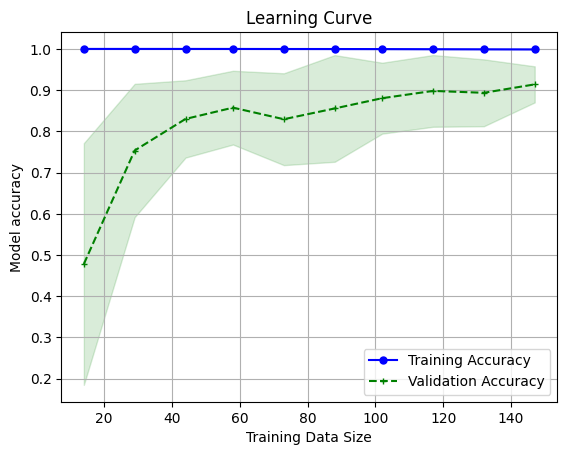

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer  
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
import pandas as pd 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv("voiture_final.csv")
# Sélectionner la variable cible et les variables explicatives
Y = df['prix']
X = df[['etat_de_route', 'nombre_portes',        'empattement',        'longueur_voiture', 'largeur_voiture', 'hauteur_voiture',        'poids_vehicule', 'nombre_cylindres', 'moteur_cc3',        'taux_alésage', 'course', 'taux_compression',        'chevaux', 'tour_moteur', 'consommation_ville',        'consommation_autoroute', "marque", "modele", 'carburant', 'turbo',        'type_vehicule', 'roues_motrices', 'emplacement_moteur', 'type_moteur',        'systeme_carburant']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

X_num = X[['etat_de_route', 'nombre_portes', 'empattement', 'longueur_voiture', 'largeur_voiture', 'hauteur_voiture', 'poids_vehicule', 'nombre_cylindres', 'moteur_cc3', 'taux_alésage', 'course', 'taux_compression', 'chevaux', 'tour_moteur', 'consommation_ville', 'consommation_autoroute']]
X_cat = X[["marque", "modele", 'carburant', 'turbo', 'type_vehicule', 'roues_motrices', 'emplacement_moteur', 'type_moteur', 'systeme_carburant']]

ttt_num = Pipeline(steps=[('scaler', MinMaxScaler()), ('poly', PolynomialFeatures(degree=2))])
ttt_cat = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', ttt_num, X_num.columns),
    ('cat', ttt_cat, X_cat.columns)
])

ridge = Lasso()

pipe = Pipeline([
    ('prep', preprocessor),     
    ('knn', ridge)              
])

trained_pipe = pipe.fit(X_train, y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test, y_test)



pipeline = pipe
#=make_pipeline(StandardScaler(),
 #                       LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, max_iter=10000))
#
# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
# #
# # Calculate training and test mean and std
# #
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# #
# # Plot the learning curve
# #
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.savefig('learning_curve.png')
plt.show()

#    estimateur trés simple


/home/apprenant/miniconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251092.68580276542, tolerance: 95039.91292142855
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298648.5268386849, tolerance: 130550.24125517243
  model = cd_fast.sparse_enet_coordinate_descent(


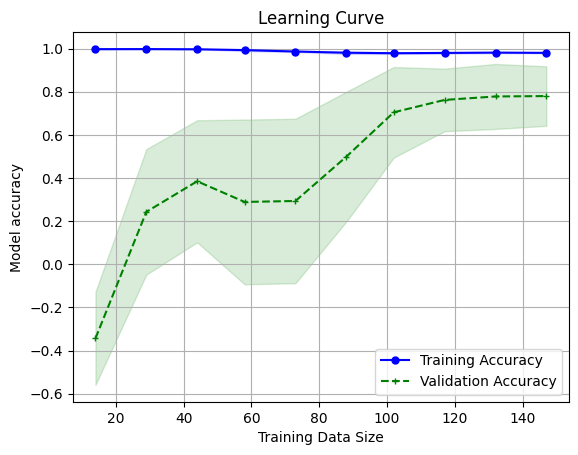

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer  
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
import pandas as pd 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("voiture_final.csv")
# Sélectionner la variable cible et les variables explicatives
Y = df['prix']
X = df[[ 'marque', 'nombre_portes','chevaux']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

#X_num = X[['etat_de_route', 'nombre_portes', 'empattement', 'longueur_voiture', 'largeur_voiture', 'hauteur_voiture', 'poids_vehicule', 'nombre_cylindres', 'moteur_cc3', 'taux_alésage', 'course', 'taux_compression', 'chevaux', 'tour_moteur', 'consommation_ville', 'consommation_autoroute']]
X_cat = X[["marque","chevaux","nombre_portes"]]
# X_num = X[['nombre_portes','c]]
ttt_num = Pipeline(steps=[('scaler', MinMaxScaler()), ('poly', PolynomialFeatures(degree=2))])
ttt_cat = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
# ('num', ttt_num, X_num.columns),
    ('cat', ttt_cat, X_cat.columns)
])

ridge = Lasso()

pipe = Pipeline([
    ('prep', preprocessor),     
    ('knn', ridge)              
])

trained_pipe = pipe.fit(X_train, y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test, y_test)

# import pickle

# with open ('sans_modele.pkl','wb') as file:
#      pickle.dump(trained_pipe, file)
from sklearn.model_selection import learning_curve
pipeline = pipe
#=make_pipeline(StandardScaler(),
 #                       LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, max_iter=10000))
#
# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
# #
# # Calculate training and test mean and std
# #
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# #
# # Plot the learning curve
# #
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.savefig('learning_curve.png')
plt.show()